# Bike Sharing Assignment

## Probelm Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

So, the company wants to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Step 1: Reading and Understanding the Data

Let us first import necessary libraries and read the dataset

In [186]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [188]:
pd.set_option('display.max_columns', None)
sns.set_theme()

In [189]:
# Read the dataset and verify with head function

bike_sharing=pd.read_csv("day.csv")
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Inspect various other aspects of the bike sharing dataset

In [190]:
bike_sharing.shape # 730 rows, 16 columns

(730, 16)

In [191]:
bike_sharing.info() # no null values, datetime value is in object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Fixing the datatype of 'dteday' variable

In [192]:
bike_sharing["dteday"]=pd.to_datetime(bike_sharing["dteday"])

#confirming the change
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [193]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Checking for missing values and fixing them

In [194]:
# Checking if the values of different columns are as per the data dictionary or not 

print("season: " + str(bike_sharing.season.unique())) # Uniqiue values of season
print("yr: " + str(bike_sharing.yr.unique())) # Uniqiue values of yr
print("mnth: " + str(bike_sharing.mnth.unique())) # Uniqiue values of mnth
print("holiday: " + str(bike_sharing.holiday.unique())) # Uniqiue values of holiday
print("weekday: " + str(bike_sharing.weekday.unique())) # Uniqiue values of weekday
print("workingday: " + str(bike_sharing.workingday.unique())) # Uniqiue values of workingday
print("weathersit: " + str(bike_sharing.weathersit.unique())) # Uniqiue values of weathersit

season: [1 2 3 4]
yr: [0 1]
mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday: [0 1]
weekday: [6 0 1 2 3 4 5]
workingday: [0 1]
weathersit: [2 1 3]


In [195]:
# Checking of number of bikes shared on any day is 0 or less (missing value)
bike_sharing.casual.value_counts()

120     4
968     4
639     3
163     3
775     3
       ..
2521    1
1935    1
783     1
688     1
364     1
Name: casual, Length: 605, dtype: int64

In [196]:
bike_sharing.registered.value_counts()

4841    3
6248    3
1707    3
3461    2
2713    2
       ..
4138    1
3231    1
4018    1
3077    1
2290    1
Name: registered, Length: 678, dtype: int64

No missing values found, moving ahead

### Renaming columns for better understanding

In [197]:
bike_sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [198]:
bike_sharing=bike_sharing.rename(columns={'dteday':'date_day','yr':'year','mnth':'month','weekday':'day_of_week','weathersit':'weather','atemp':'feeling_temp','hum':'humidity','cnt':'total_bikes_shared'})

In [199]:
bike_sharing.columns

Index(['instant', 'date_day', 'season', 'year', 'month', 'holiday',
       'day_of_week', 'workingday', 'weather', 'temp', 'feeling_temp',
       'humidity', 'windspeed', 'casual', 'registered', 'total_bikes_shared'],
      dtype='object')

### Removing unwanted columns

In [200]:
def checkIfSumOfRegisteredCasualIsTotal(x):
  if x.registered + x.casual == x.total_bikes_shared:
    return True
  else:
    return False

bike_sharing[['registered','casual','total_bikes_shared']].apply(checkIfSumOfRegisteredCasualIsTotal,axis=1).sum()

730

In [201]:
# Since registered + casual = total, registered and casual are basically dependent on other independent variables. 
# They will not give us any specific information regarding total bikes shared. So removing those also.

bike_sharing.drop(['instant','registered','casual'],axis=1,inplace=True)

## Step 2: Visualising the Data

- We will check if there is some multicollinearity present among the independent variables
- We can also identify here is some predictors directly have a strong association with the outcome variable

### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [202]:
bike_sharing.columns

Index(['date_day', 'season', 'year', 'month', 'holiday', 'day_of_week',
       'workingday', 'weather', 'temp', 'feeling_temp', 'humidity',
       'windspeed', 'total_bikes_shared'],
      dtype='object')

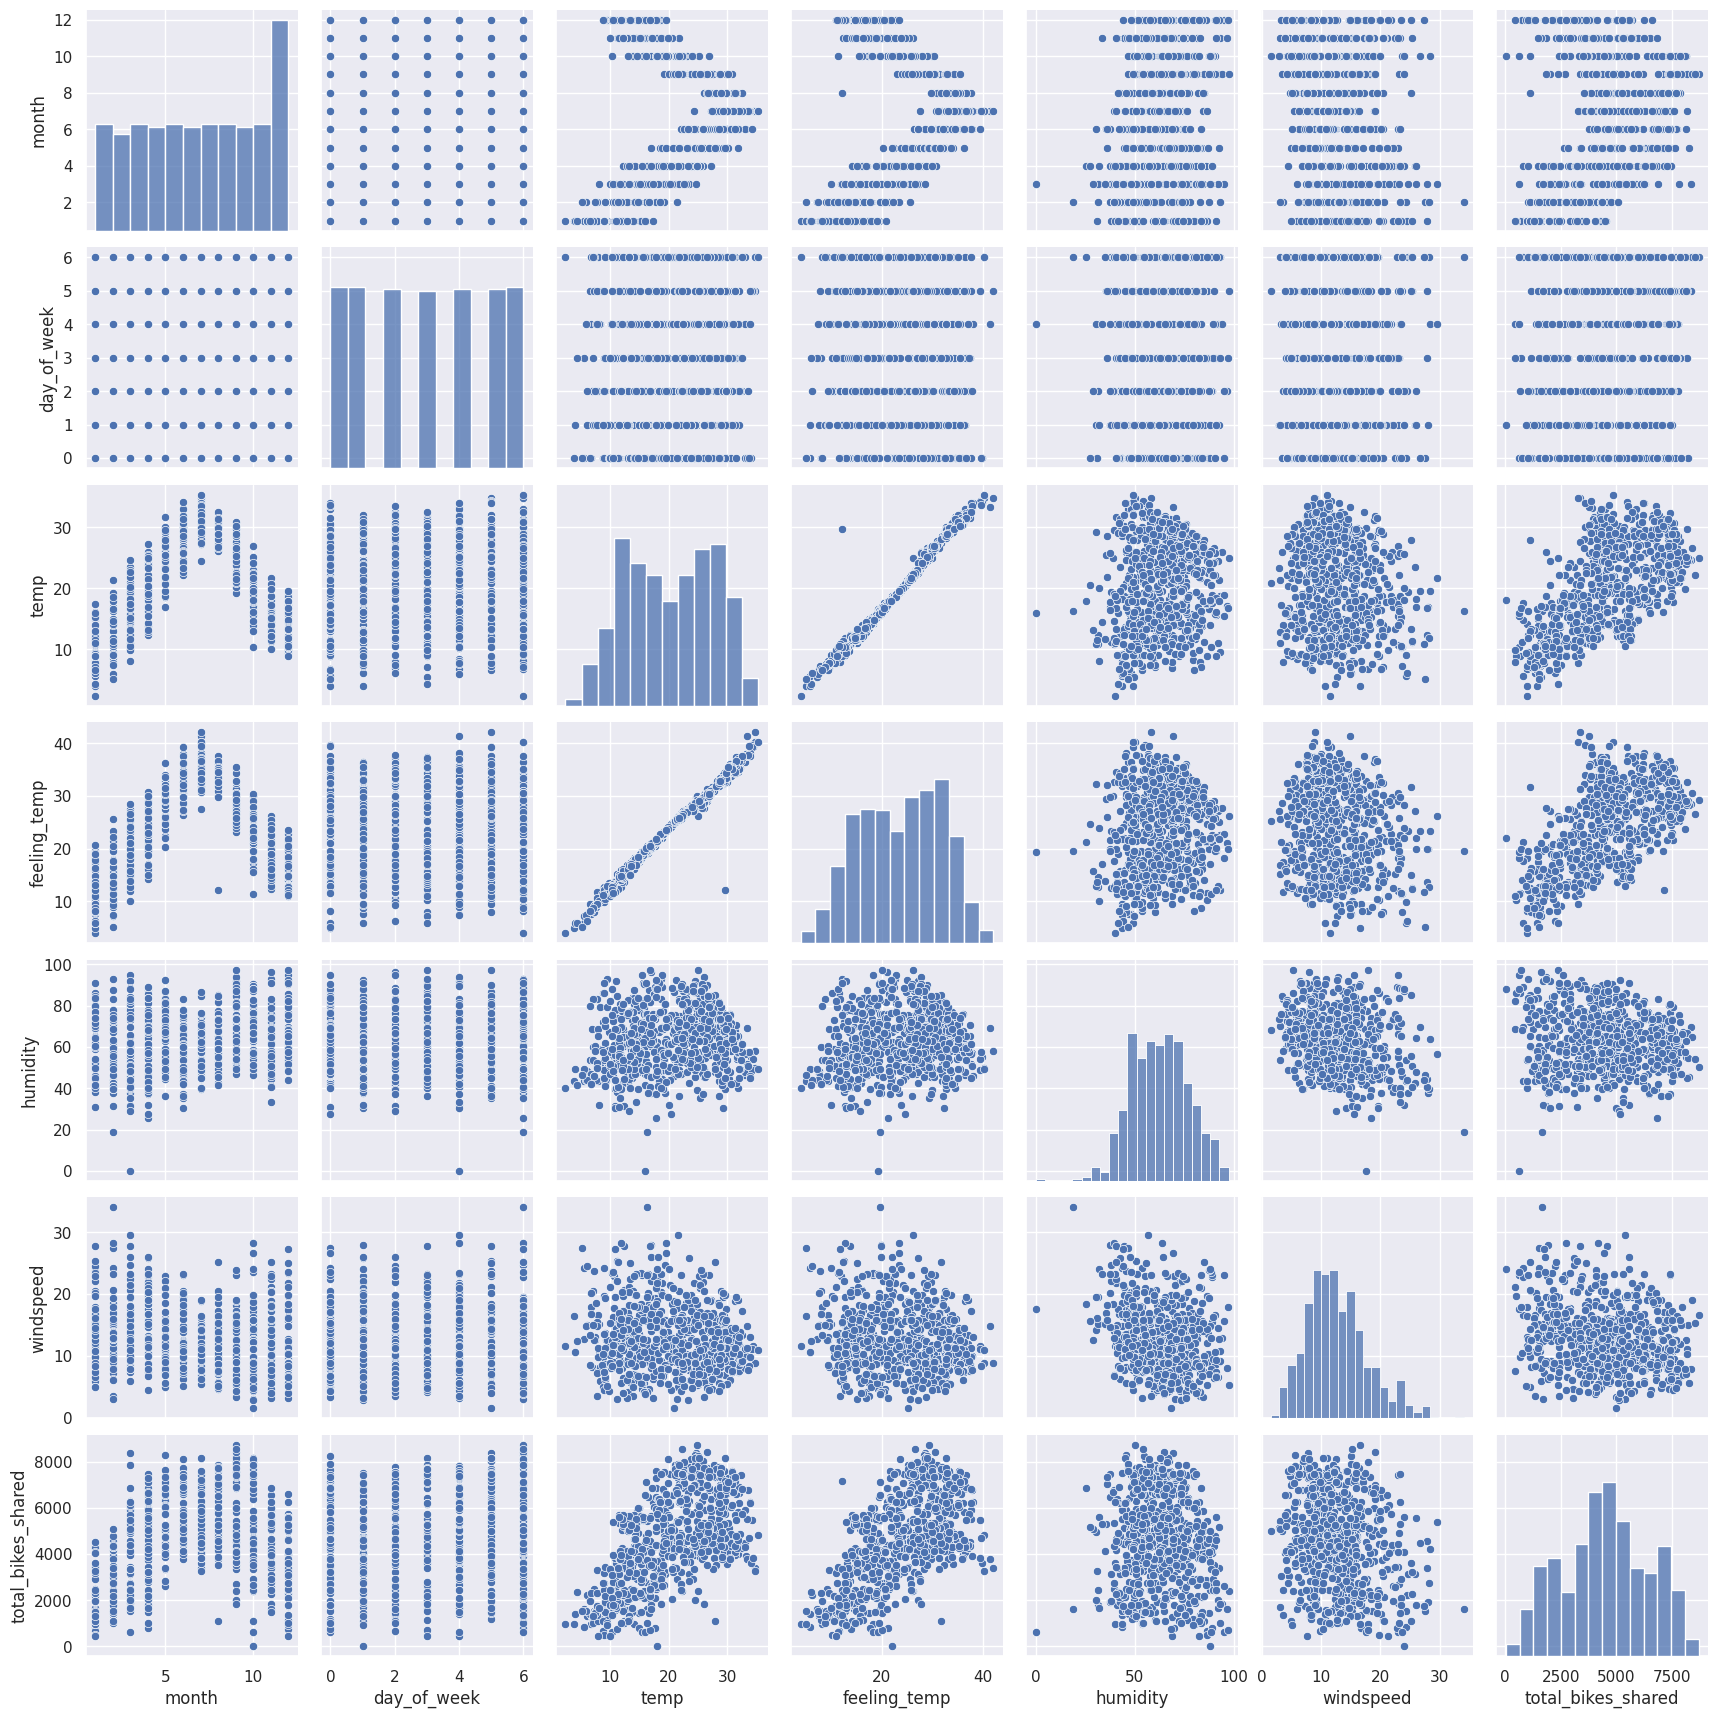

In [203]:
numeric_variables = ['month','day_of_week','temp','feeling_temp','humidity','windspeed','total_bikes_shared']

sns.pairplot(bike_sharing[numeric_variables])
plt.show()

**Observations:**

- There is a positive correlation with 'temp' and 'feeling_temp'.
- There is high collinearity among 'temp' and 'feeling_temp' variables. We will fix it in the coming steps.
- 'windspeed' and 'humidity' also looks negatively correlated.

### Visualising Categorical Variables

Let's make a pairplot of all the categorical variables

In [204]:
bike_sharing.columns

Index(['date_day', 'season', 'year', 'month', 'holiday', 'day_of_week',
       'workingday', 'weather', 'temp', 'feeling_temp', 'humidity',
       'windspeed', 'total_bikes_shared'],
      dtype='object')

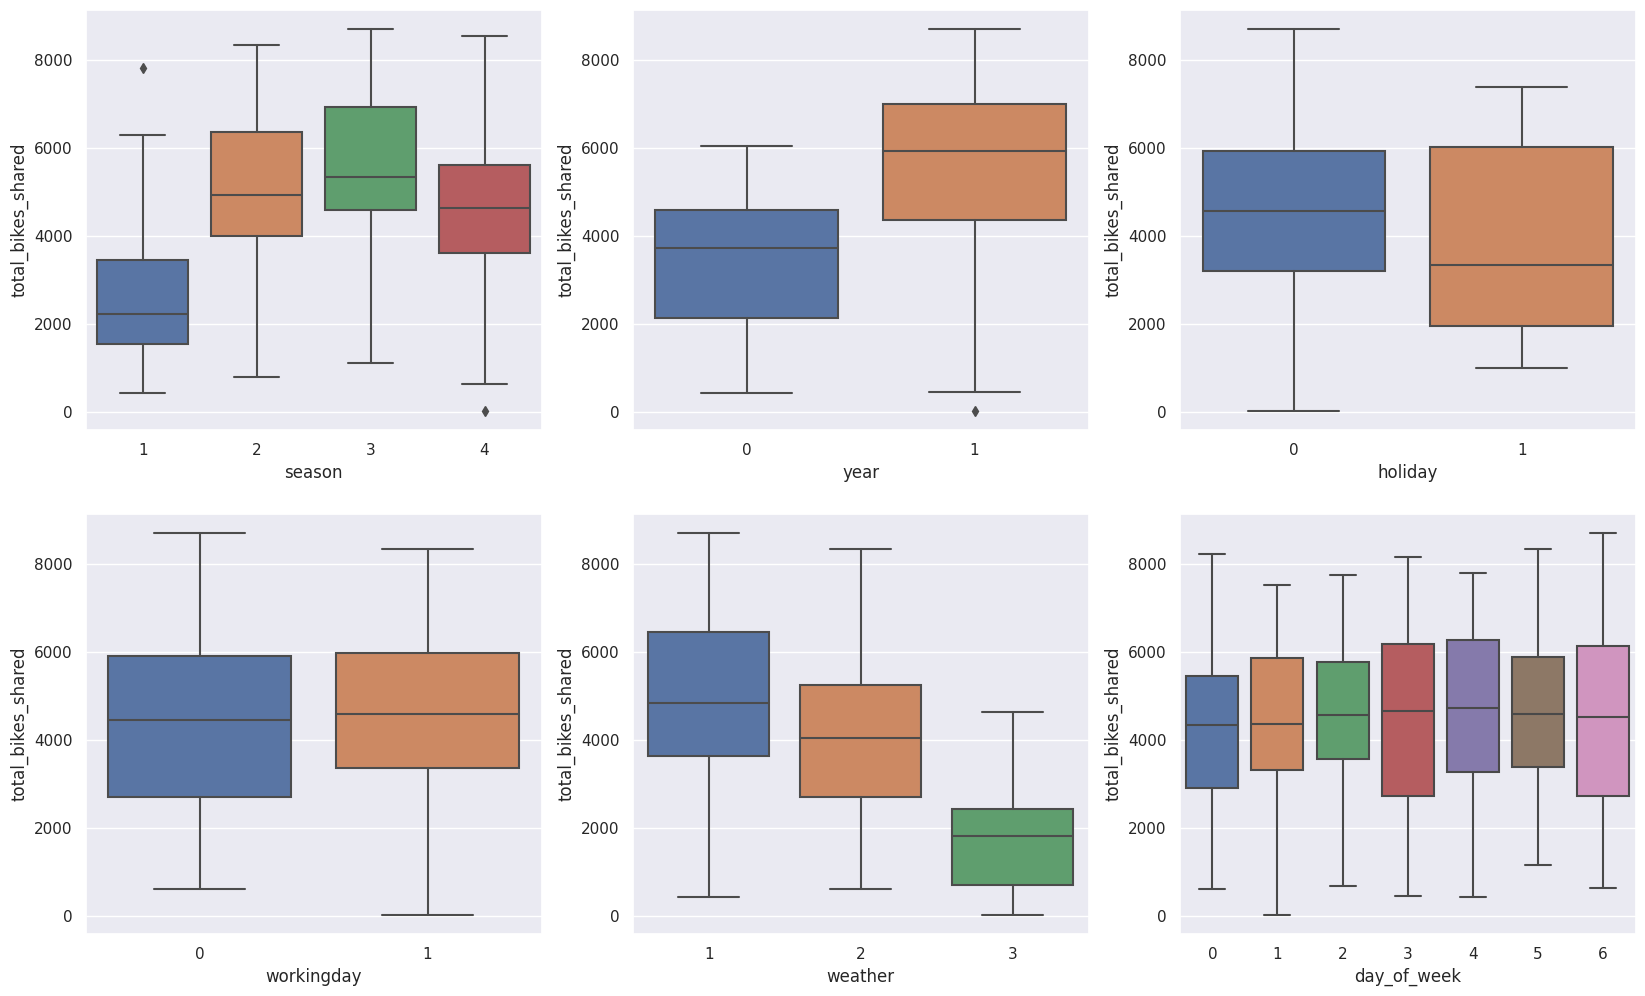

In [205]:
categorical_columns=['season','year','holiday','workingday','weather','day_of_week']

plt.figure(figsize=(20, 12))
for i in range(0,len(categorical_columns)):
  plt.subplot(2,3,i+1)
  sns.boxplot(x = categorical_columns[i], y = 'total_bikes_shared', data = bike_sharing)  
plt.show()

**Observations:**

- There is a difference in the number of bikes shared during different season. for season 1(Spring) the number is very less than that of other seasons. There are sublte differences in the number among other seasons as well but the Spring season looks significant
- There is clearly rise in the number of bikes shared in the year 2019, which indicates that the business increased in 2019, and looks like it has a scope of increasing after CoVID as well.
- There is a clear difference in the number of bikes shared for different types of weather. So the number of bikes shared seems to be directly associated with the weather.
- There are differences in the number of bikes shared when compared with other two variables as well, but they are very subtle.


## Step 3: Data Preparation

### Converting categorical variables to numeric using dummy variables

- As seen in the data, we have 2 columns with values [1,2,3,4] - 'season' and 'weather'. We will convert these to categorical string values and then create dummy variables for the same. This will help us further in the model builiding.
- We are also converting week and month column to categorical variables 

In [206]:
# Converting weather to categorical string

def convertWeather(x):
  return x.map({1:'Clear',2:'Mist',3:'LightRainSnow',4:'HeavyRainSnow'})

bike_sharing[['weather']]=bike_sharing[['weather']].apply(convertWeather)

In [207]:
# Converting season to categorical string

def convertSeason(x):
  return x.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

bike_sharing[['season']]=bike_sharing[['season']].apply(convertSeason)

In [208]:
# Converting month to categorical string

def convertMonth(x):
  return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

bike_sharing[['month']]=bike_sharing[['month']].apply(convertMonth)

In [209]:
# Converting day_of_week to categorical string

def convertDayOfWeek(x):
  return x.map({0:'Tuesday',1:'Wednesday',2:'Thursday',3:'Friday',4:'Saturday',5:'Sunday',6:'Monday'})

bike_sharing[['day_of_week']]=bike_sharing[['day_of_week']].apply(convertDayOfWeek)

In [210]:
# Create dummies for weather

bike_sharing = pd.concat([bike_sharing, pd.get_dummies(bike_sharing['weather'])], axis = 1)

In [211]:
# Create dummies for season

bike_sharing = pd.concat([bike_sharing, pd.get_dummies(bike_sharing['season'],drop_first=True)], axis = 1)

In [212]:
# Create dummies for month

bike_sharing = pd.concat([bike_sharing, pd.get_dummies(bike_sharing['month'],drop_first=True)], axis = 1)

In [213]:
# Create dummies for day_of_week

bike_sharing = pd.concat([bike_sharing, pd.get_dummies(bike_sharing['day_of_week'],drop_first=True)], axis = 1)

In [214]:
# Drop 'weather' and 'season' as we have created the dummies for it

bike_sharing.drop(['weather','season','month','day_of_week'], axis = 1, inplace = True)

In [215]:
bike_sharing.head()

,date_day,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,total_bikes_shared,Clear,LightRainSnow,Mist,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2018-02-01,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Converting date to numeric column

In [216]:
bike_sharing['date_day'] = bike_sharing['date_day'].map(dt.datetime.toordinal)

## Step 4: Splitting the Data into Training and Testing Sets

In [217]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

In [218]:
scaler = MinMaxScaler()

In [219]:
df_train.columns

Index(['date_day', 'year', 'holiday', 'workingday', 'temp', 'feeling_temp',
       'humidity', 'windspeed', 'total_bikes_shared', 'Clear', 'LightRainSnow',
       'Mist', 'Spring', 'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [220]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['date_day', 'temp', 'feeling_temp', 'humidity', 'windspeed','total_bikes_shared']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [221]:
df_train.head()

,date_day,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,total_bikes_shared,Clear,LightRainSnow,Mist,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,0.896978,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
576,0.791209,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
426,0.585165,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
728,1.000000,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
482,0.662088,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [222]:
df_train.describe()

,date_day,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,total_bikes_shared,Clear,LightRainSnow,Mist,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.503954,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.627451,0.029412,0.343137,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980
std,0.292040,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.483958,0.169124,0.475223,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.248970,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.507555,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.759272,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


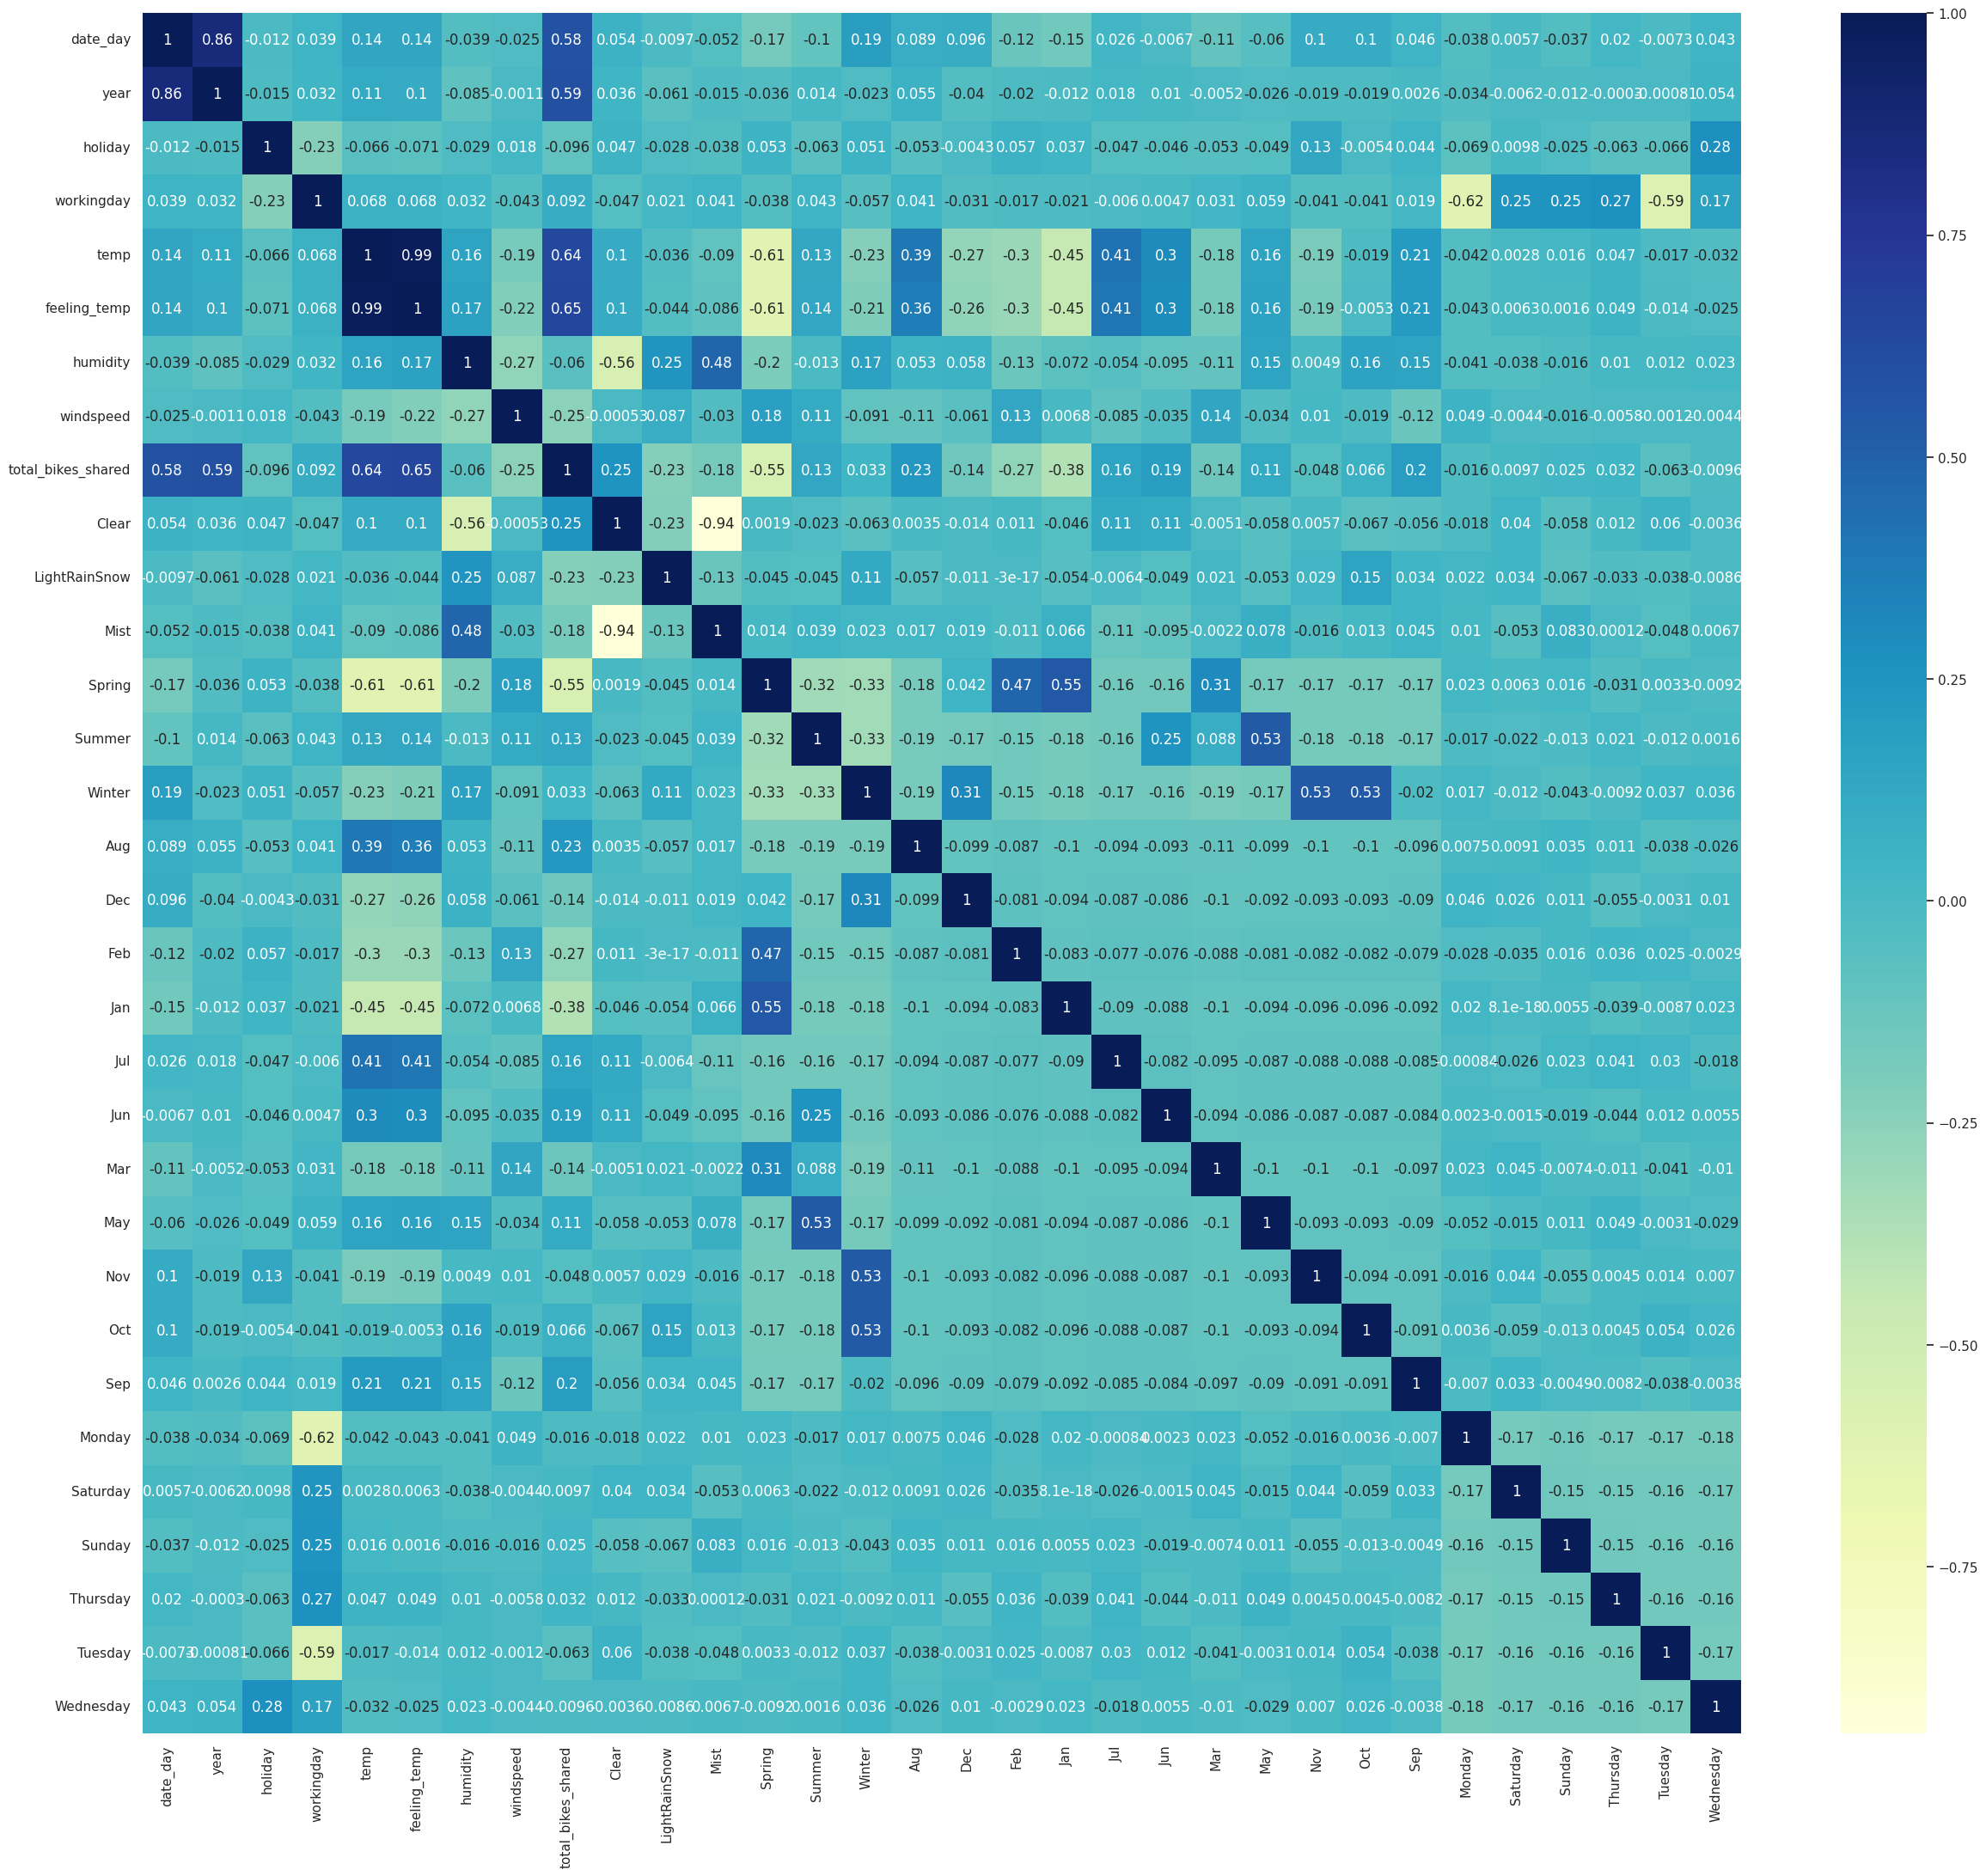

In [223]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 26))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As per the graph, `total_bikes_shared` and `feeling_temp` looks highly correlated. Plotting a pair plot of `feeling_temp` vs. `total_bikes_shared`

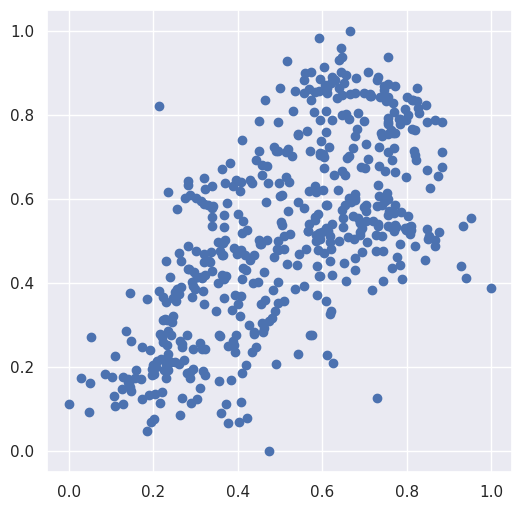

In [224]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.feeling_temp, df_train.total_bikes_shared)
plt.show()

`total_bikes_shared` and `feeling_temp` seems correlated. We will pick `feeling_temp` as first variable and try to fit regression line to that.

### Dividing into X and Y sets for the model building

In [225]:
y_train = df_train.pop('total_bikes_shared')
X_train = df_train

## Step 5: Building a linear model

Taking a bottom-up approach will take a lot of time and effort as we have a lot of variables, so we will start with RFE by selecting best 15 variables, then deciding which ones to remove/keep on the basis of p-value and VIF

 ### Model 1 - RFE (Recursive feature elimination)

In [226]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [227]:
X = X_train[X_train.columns[rfe.support_]]

### Model 2

In [228]:
# Add a constant
X_train_lm2 = sm.add_constant(X)

# Create a fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.params

const            0.057826
year             0.228354
holiday         -0.055657
workingday       0.049051
temp             0.594540
humidity        -0.170763
windspeed       -0.187749
Clear            0.118205
LightRainSnow   -0.123154
Mist             0.062775
Summer           0.080606
Winter           0.136750
Jul             -0.045575
Sep              0.094477
Monday           0.058941
Tuesday          0.005490
dtype: float64

In [229]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:     total_bikes_shared   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.2
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          2.77e-191
Time:                        12:38:01   Log-Likelihood:                 514.15
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -941.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0578      0.021      2.813

### Check VIF - 1

In [230]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
6,Clear,inf
7,LightRainSnow,inf
8,Mist,inf
13,Monday,inf
14,Tuesday,inf
4,humidity,1.89
3,temp,1.60
11,Jul,1.43


`Tuesday` has both high p-value and high VIF. So we will first remove the variable having high p-value: `Tuesday`

Dropping the variable: `Nov` and updating the model.

In [231]:
# Dropping insignificant variables and highly correlated variables

X = X.drop('Tuesday', 1,)

### Model 3

In [232]:
# Add a constant
X_train_lm3 = sm.add_constant(X)

# Create a fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.params

const            0.061943
year             0.228354
holiday         -0.061146
workingday       0.043562
temp             0.594540
humidity        -0.170763
windspeed       -0.187749
Clear            0.119577
LightRainSnow   -0.121782
Mist             0.064147
Summer           0.080606
Winter           0.136750
Jul             -0.045575
Sep              0.094477
Monday           0.053452
dtype: float64

In [233]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:     total_bikes_shared   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.2
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          2.77e-191
Time:                        12:38:01   Log-Likelihood:                 514.15
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -941.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0619      0.025      2.432

### Check VIF - 2

In [234]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Clear,33.02
8,Mist,24.81
7,LightRainSnow,3.68
4,humidity,1.89
2,workingday,1.88
13,Monday,1.78
3,temp,1.60
11,Jul,1.43
9,Summer,1.33
10,Winter,1.29


No other variable has a high p-value and high VIF. We will remove `Clear` now, which has high VIF

In [235]:
# Dropping highly correlated variables

X = X.drop('Clear', 1,)

### Model 4

In [236]:
# Add a constant
X_train_lm4 = sm.add_constant(X)

# Create a fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

lr4.params

const            0.181520
year             0.228354
holiday         -0.061146
workingday       0.043562
temp             0.594540
humidity        -0.170763
windspeed       -0.187749
LightRainSnow   -0.241359
Mist            -0.055430
Summer           0.080606
Winter           0.136750
Jul             -0.045575
Sep              0.094477
Monday           0.053452
dtype: float64

In [237]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:     total_bikes_shared   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.2
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          2.77e-191
Time:                        12:38:01   Log-Likelihood:                 514.15
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -941.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1815      0.029      6.311

### Check VIF - 3

In [238]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,humidity,16.73
3,temp,10.35
2,workingday,5.02
5,windspeed,3.79
7,Mist,2.11
0,year,2.03
12,Monday,1.90
8,Summer,1.76
9,Winter,1.71
10,Jul,1.55


No variable has high p-value now. So we will remove variable having very high VIF. The variable having highest VIF here is: `humidity`

In [239]:
# Dropping highly correlated variables

X = X.drop('humidity', 1,)

### Model 5

In [240]:
# Add a constant
X_train_lm5 = sm.add_constant(X)

# Create a fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

lr5.params

const            0.081751
year             0.232303
holiday         -0.058997
workingday       0.046928
temp             0.568575
windspeed       -0.154991
LightRainSnow   -0.288240
Mist            -0.082801
Summer           0.079369
Winter           0.128135
Jul             -0.038456
Sep              0.090429
Monday           0.058711
dtype: float64

In [241]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:     total_bikes_shared   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.2
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          4.92e-188
Time:                        12:38:01   Log-Likelihood:                 503.63
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     497   BIC:                            -926.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0818      0.019      4.280

Although the R-squared has shown a significane difference after dropping `humidity`, we can't keep it. As it is highly collinear with other independent variable and has very high VIF value. R-square value went from `0.845` to `0.839`. But this is also pretty good.

Prob (F-statistic) value for this model is also very very less, which is ideal.

### Check VIF - 4

In [242]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.47
2,workingday,4.38
4,windspeed,3.57
0,year,2.02
11,Monday,1.77
7,Summer,1.75
6,Mist,1.54
9,Jul,1.53
8,Winter,1.49
10,Sep,1.29


Now, model 5 looks like a stable one, but since the VIF of `temp` is higher than 5, we will build a new model without `temp` and compare it with model 5.

In [243]:
# Dropping temp to create new model

X2 = X.drop(['temp'],1,)

### Model 6

In [244]:
# Add a constant
X_train_lm6 = sm.add_constant(X2)

# Create a fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

lr6.params

const            0.375982
year             0.255423
holiday         -0.083408
workingday       0.056436
windspeed       -0.267655
LightRainSnow   -0.298565
Mist            -0.100719
Summer           0.147224
Winter           0.102582
Jul              0.172232
Sep              0.216324
Monday           0.057313
dtype: float64

In [245]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:     total_bikes_shared   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     74.08
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           2.14e-97
Time:                        12:38:01   Log-Likelihood:                 285.70
No. Observations:                 510   AIC:                            -547.4
Df Residuals:                     498   BIC:                            -496.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3760      0.024     15.983

- Removing the `temp` variable has shown a significane decrease in R-squared from **0.839** to **0.621**.
- There is also a significant change in the F-prob. It increased from **4.92e-188** to **2.14e-97**.
- So we will not remove the `temp` variable as it's VIF is not that high and it is more significant

So, we can take the final model to be: Model 5. But before that, we need to check the error terms using this model and then finalize.

## Step 6: Residual Analysis of the train data

In [246]:
y_train_pred = lr5.predict(X_train_lm5)

### Histogram

So, now to check if the error terms are also normally distributed, plotting the histogram of the error terms and see what it looks like.

Text(0.5, 0, 'Errors')

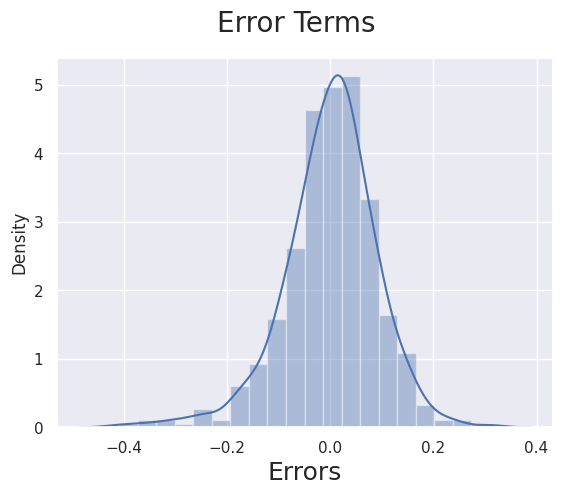

In [247]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

As seen in the graph, the errors are normally distributed and centered around at 0. i.e., the mean of errors is 0.

### Scatter Plot

Plot scatter plot for error values and see how they are scattered to confirm that there are no patterns present in the errors

Text(0, 0.5, 'Errors')

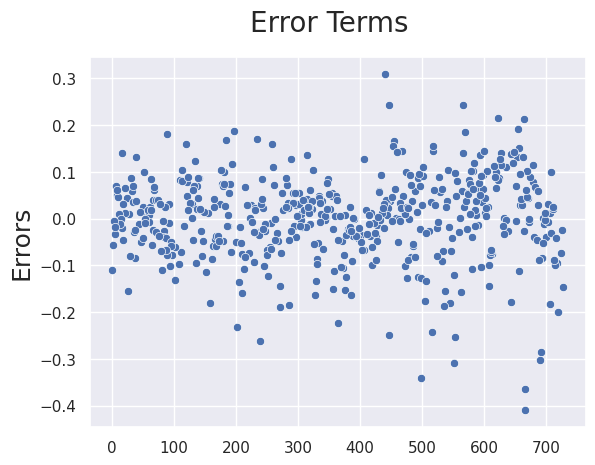

In [248]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.scatterplot(y=(y_train - y_train_pred),x=X_train_lm6.index)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.ylabel('Errors', fontsize = 18)                         # X-label

Error terms are equally distributed around zero in both the directions. There are no patterns as well

## Step 7: Making Predictions Using the Final Model

After having fitted the model and checked the normality of error terms, making predictions using the final, i.e. 6th model.

#### Applying the scaling on the test sets

In [249]:
num_vars = ['date_day', 'temp', 'feeling_temp', 'humidity', 'windspeed','total_bikes_shared']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [250]:
df_test.describe()

,date_day,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,total_bikes_shared,Clear,LightRainSnow,Mist,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.492291,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.652968,0.027397,0.319635,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.164384,0.178082,0.164384,0.146119,0.127854
std,0.284993,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.477117,0.163612,0.467403,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.371472,0.383458,0.371472,0.354034,0.334692
min,0.001374,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.256868,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.478022,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.736951,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.001374,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [251]:
y_test = df_test.pop('total_bikes_shared')
X_test = df_test

In [252]:
cols_to_remove=[x for x in X_test.columns if x not in X.columns]

X_test_m5 = X_test.drop(cols_to_remove, axis=1)

In [253]:
# Adding constant variable to test dataframe
X_test_m5 = sm.add_constant(X_test_m5)

In [254]:
# Making predictions using the 6th model

y_pred_m5 = lr5.predict(X_test_m5)

## Step 8: Model Evaluation

Plotting the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

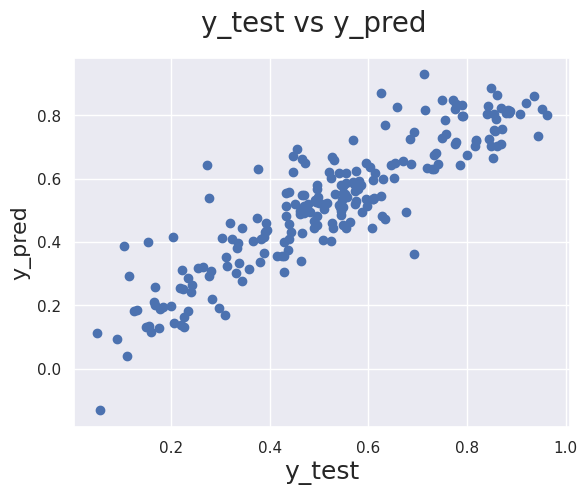

In [255]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [256]:
r2_score(y_test, y_pred_m5)

0.7955789654753546

We can see that there is a linear relationship between original and predicted values. And R-squared for predicted values is also `0.795`. So this looks like a decent model overall.

So, according to our final model: Model 6, the best fitted line is:

$ total\_bikes\_shared = 0.2323  \times  year - 0.0589  \times  holiday + 0.0469 \times workingday + 0.5686 \times temp - 0.1549 \times windspeed - 0.2882 \times LightRainSnow - 0.0828 \times Mist + 0.0793 \times Summer + 0.1281 \times Winter - 0.0384 \times Jul + 0.0904 \times Sep + 0.0587 \times Monday + 0.0817 $